In [ ]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scipy
from matplotlib import rc
import matplotlib
import yfinance
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
spx = pd.read_csv('../data/spx.csv').stack().tolist()

**Downloading data and calculating returns**

In [71]:
raw_data = yfinance.download(spx, start="2013-1-1", back_adjust=True, auto_adjust=True)
closing_prices = raw_data['Close']
returns = closing_prices.pct_change().iloc[1:].ffill()-(1**(1/250)-1)

[*********************100%***********************]  504 of 504 completed

11 Failed downloads:
- TIF: No data found, symbol may be delisted
- MYL: No data found, symbol may be delisted
- VAR: No data found, symbol may be delisted
- CXO: No data found, symbol may be delisted
- FLIR: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- CTL: No data found, symbol may be delisted
- ETFC: No data found, symbol may be delisted
- ALXN: No data found, symbol may be delisted
- NBL: No data found, symbol may be delisted


**Fitting distribution to data and drawing data**

In [72]:
ticker="XYL"

mu, std = scipy.norm.fit(returns[ticker]) #normal distribution fit
beta, loc_ged, scale_ged = scipy.gennorm.fit(returns[ticker]) #GED fit
df, nc_t, loc_t, scale_t = scipy.nct.fit(returns[ticker]) #skewed student's t distrubiton fit
#df, loc_t, scale_t = scipy.t.fit(returns[ticker]) #student's t distrubiton fit

#draw data
normal_data=scipy.norm.rvs(mu,std, size=len(returns))
GED_data=scipy.gennorm.rvs(beta,loc_ged,scale_ged, size=len(returns))
t_data=scipy.nct.rvs(df,nc_t,loc_t,scale_t, size=len(returns))
#t_data=scipy.t.rvs(df,loc_t,scale_t, size=len(returns))

**Plotting data**

D:\Programmer\Anaconda\lib\site-packages\seaborn\distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
D:\Programmer\Anaconda\lib\site-packages\seaborn\distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist, = ax.plot(support, density, **artist_kws)
D:\Programmer\Anaconda\lib\site-packages\seaborn\distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
D:\Programmer\Anaconda\lib\site-packages\seaborn\distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist, = ax.plot(support, density, **

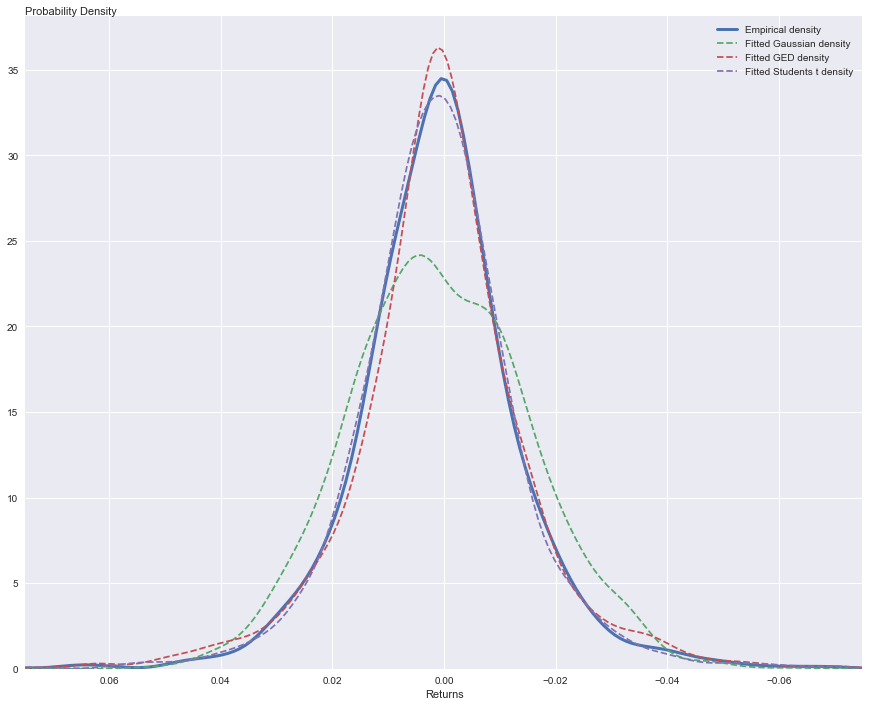

In [76]:
f, ax1 = plt.subplots(1, 1, figsize=(15,12))
sns.kdeplot(data=returns[ticker],clip=(-0.1, 0.1),linewidth=3,alpha=.1,Label='Empirical density')
sns.kdeplot(data=normal_data,clip=(-0.1, 0.1),linestyle="--",Label='Fitted Gaussian density')
sns.kdeplot(data=GED_data,clip=(-0.1, 0.1),linestyle="--",Label='Fitted GED density')
sns.kdeplot(data=t_data,clip=(-0.1, 0.1),linestyle="--",Label='Fitted Students t density')
plt.xlim(0.075,-0.075)
plt.xlabel('Returns') 
plt.legend()
ax1.set_ylabel('Probability Density',loc='top', rotation = 0, labelpad = -110) 
plt.savefig("Density.png", bbox_inches = 'tight', pad_inches = 0.1)

(-0.35, 0.35)

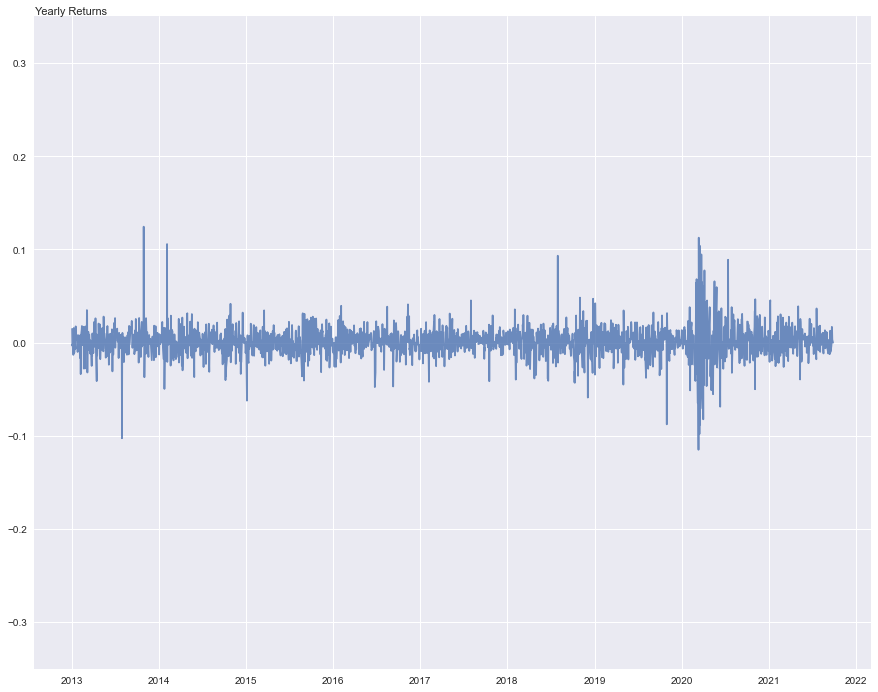

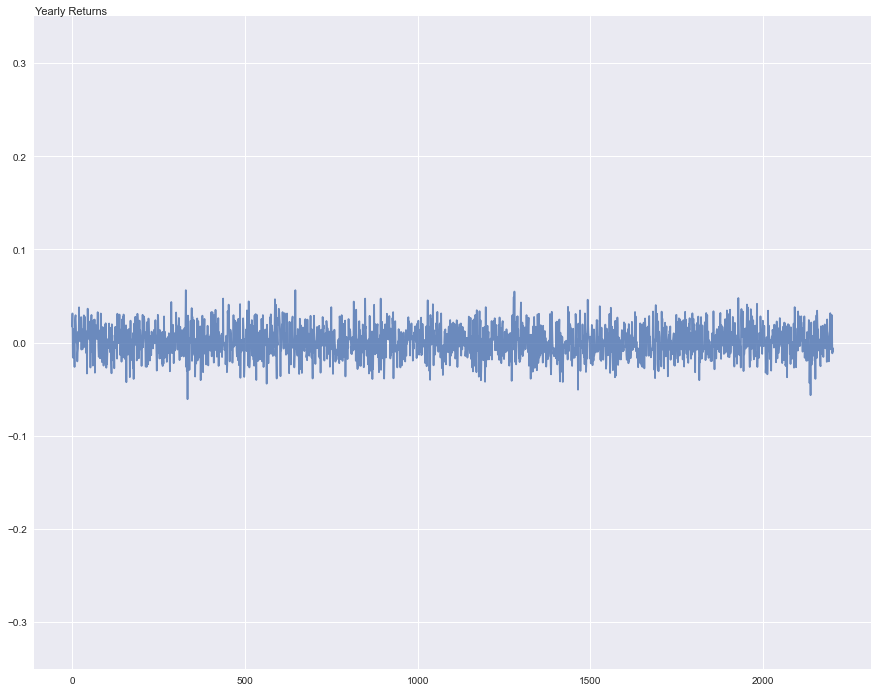

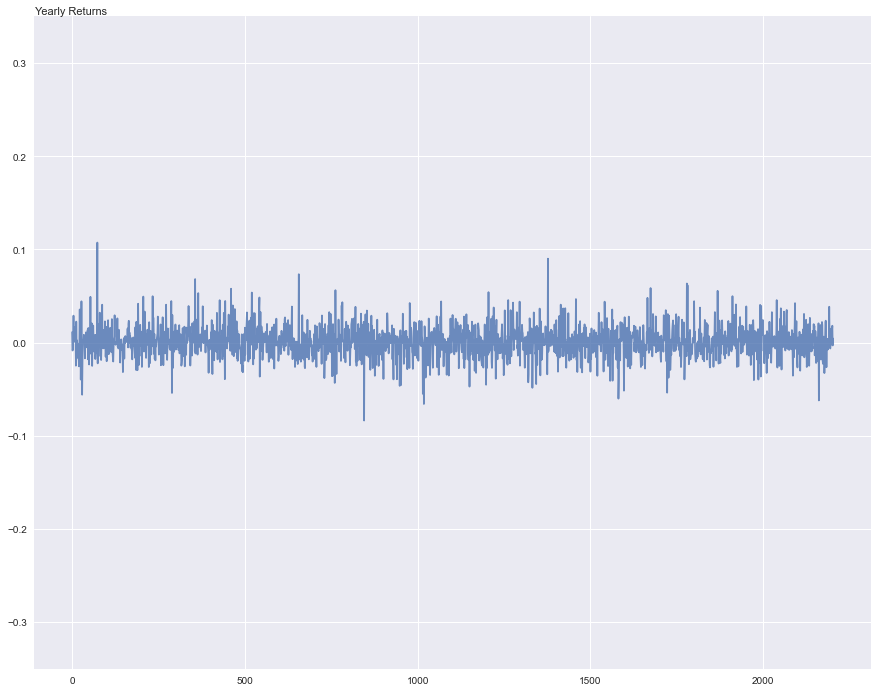

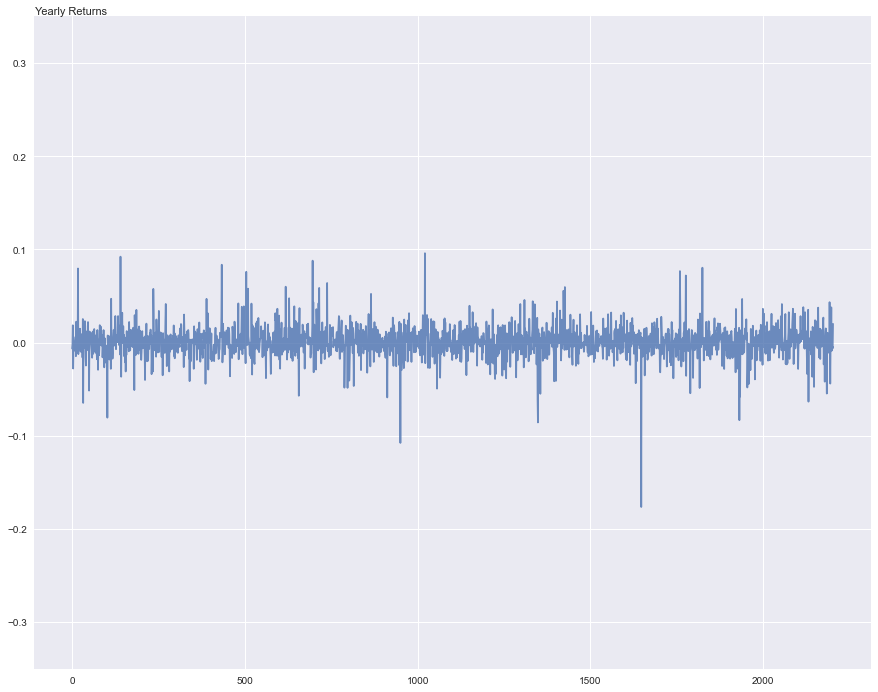

In [70]:
f, ax1 = plt.subplots(1, 1, figsize=(15,12))
ax1.plot(returns[ticker], alpha=.8)
ax1.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -100)
ax1.set_ylim((-0.35,0.35))
#plt.savefig("Empirical timeseries.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax2 = plt.subplots(1, 1, figsize=(15,12))
ax2.plot(normal_data, alpha=.8)
ax2.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -100)
ax2.set_ylim((-0.35,0.35))
#plt.savefig("Gaussian timeseries.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax3 = plt.subplots(1, 1, figsize=(15,12))
ax3.plot(GED_data, alpha=.8)
ax3.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -100)
ax3.set_ylim((-0.35,0.35))
#plt.savefig("GED timeseries.png", bbox_inches = 'tight', pad_inches = 0.1)

f, ax4 = plt.subplots(1, 1, figsize=(15,12))
ax4.plot(t_data, alpha=.8)
ax4.set_ylabel('Yearly Returns',loc='top', rotation = 0, labelpad = -100)
ax4.set_ylim((-0.35,0.35))
#plt.savefig("Skewed Student's t timeseries.png", bbox_inches = 'tight', pad_inches = 0.1)